### The goal of this project is to calculate the rent value of a house based on its features and location.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#configuring pandas
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)
#configuring matplotlib
plt.rcParams['figure.figsize']=(15,6)
plt.style.use('seaborn-darkgrid')

### Exploring data

In [2]:
Base_Dados = pd.read_csv('house_data.csv')

In [3]:
Base_Dados.shape

(10692, 13)

In [4]:
Base_Dados.head(3)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841


In [5]:
# selecting the features to remove
Base_Dados.drop(columns=['fire insurance (R$)','total (R$)'],inplace=True)

In [6]:
# checking if 2 columns were deleted. should have 11 now
Base_Dados.shape

(10692, 11)

In [7]:
# checking null values
Base_Dados.isnull().sum().sort_values(ascending=False)

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [8]:
# counting unique values in each column
Base_Dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [9]:
#checking column types
Base_Dados.info()
Base_Dados.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


int64     7
object    4
dtype: int64

## Exploratory Data Analysis (EDA)

In [10]:
# To facilitate the next steps, we will split the column names in categorial columns and no categorical
Categorical_columns = Base_Dados.columns[Base_Dados.dtypes == object]
Numerical_columns = Base_Dados.columns[Base_Dados.dtypes != object]

Categorical_columns,Numerical_columns

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [11]:
# Analyzing the percentage of data by city
Base_Dados['city'].value_counts(normalize=True)*100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [12]:
# Another way to analyzing the percentage of data of each categorical column
for i in Categorical_columns:
    analysis = Base_Dados[i].value_counts(normalize=True)*100
    print(i, '\n', analysis, '\n')

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



### Cleaning the data

In [13]:
# Taking a close look into the register with floor number 308 (input error)
Base_Dados.loc[Base_Dados['floor']=='301']

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164


In [14]:
Base_Dados.iloc[2562,5] # selecting the line and column

'301'

In [15]:
Base_Dados.iloc[2562,5]=30 # changing the value of the floor to 30

In [16]:
Base_Dados.loc[Base_Dados['floor']==30] # checking the line with floor = 30. Should be the line with index 2562

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,30,acept,not furnished,750,2600,164


In [17]:
# replacing the floor "-" with 0 (in each line of floor column, put 0 if andar = "-" or put andar if not)
Base_Dados['floor'].apply(lambda andar: 0 if andar=='-' else andar)

0         7
1        20
2         6
3         2
4         1
         ..
10687     5
10688    17
10689     8
10690     8
10691     0
Name: floor, Length: 10692, dtype: object

In [18]:
Base_Dados.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165


In [19]:
Base_Dados['floor']= Base_Dados['floor'].apply(lambda Registro: 0 if Registro=='-' else Registro)

In [20]:
Base_Dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

In [21]:
pd.to_numeric(Base_Dados['floor'])

0         7
1        20
2         6
3         2
4         1
         ..
10687     5
10688    17
10689     8
10690     8
10691     0
Name: floor, Length: 10692, dtype: int64

In [22]:
Base_Dados['floor'] = pd.to_numeric(Base_Dados['floor'])

In [23]:
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [24]:
len( Numerical_columns )

7

In [25]:
Base_Dados['floor'].value_counts(normalize=True)*100

0     23.017209
1     10.110363
2      9.212495
3      8.707445
4      6.995885
5      5.611672
6      5.041152
7      4.648335
8      4.582866
9      3.451178
10     3.338945
11     2.833895
12     2.403666
13     1.870557
14     1.589974
15     1.374860
16     1.019454
17     0.897868
18     0.701459
19     0.495698
20     0.411523
21     0.392817
25     0.233820
23     0.233820
22     0.224467
26     0.187056
24     0.177703
27     0.074822
28     0.056117
29     0.046764
32     0.018706
35     0.009353
46     0.009353
30     0.009353
51     0.009353
Name: floor, dtype: float64

### Visualizing the data

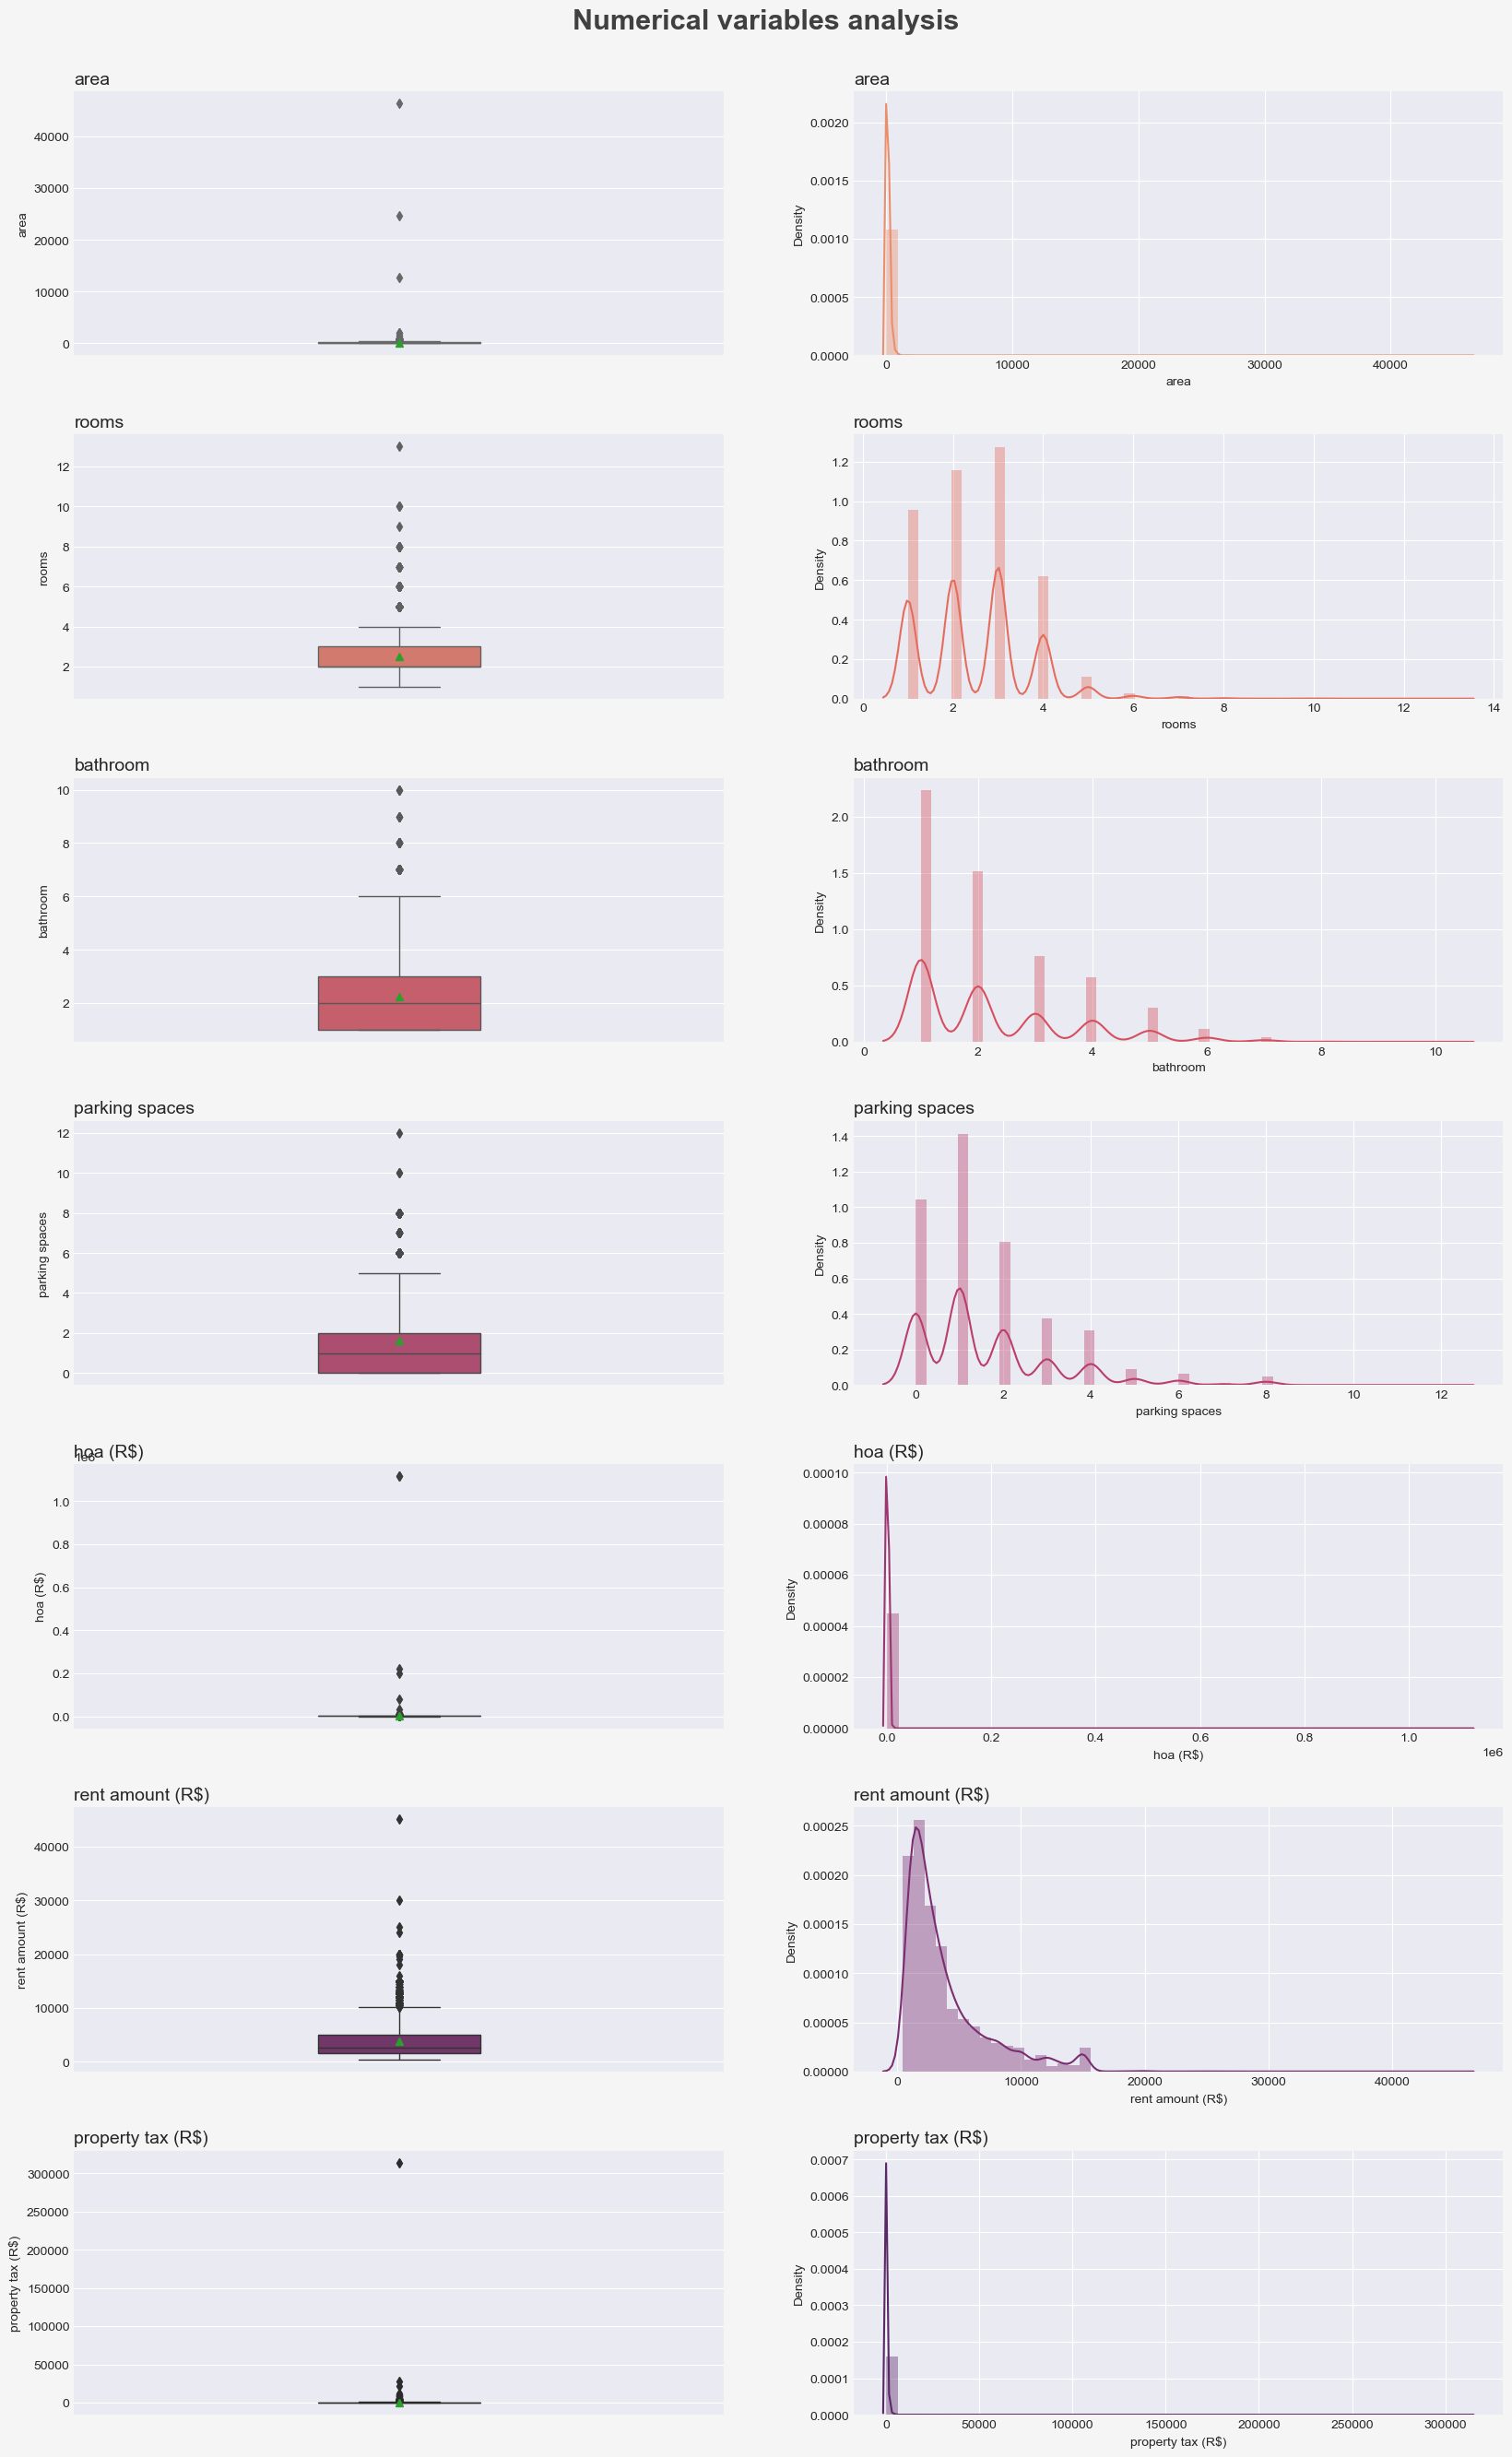

In [26]:
# Grid - charts

# size
Figura, Eixo = plt.subplots( figsize=(20, 30) )

# Background color
Cor_Fundo = '#f5f5f5'
Figura.set_facecolor( Cor_Fundo )

# Palette color
Paleta_Cores = sns.color_palette( 'flare', len(Numerical_columns) * 2 )

# Title
plt.suptitle('Numerical variables analysis', fontsize=22, color='#404040', fontweight=600 )

# Structure
Linhas = 7 # (Todas as infos numericas)
Colunas = 2 #( Boxplot - Distplot)
Posicao = 1 # Posicao inicial do grid

# Loop to plot the charts
for Coluna in Numerical_columns:

  # Plotting into grid -- Boxplot
  plt.subplot( Linhas, Colunas, Posicao )

  # Title
  plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

  # Plot
  sns.boxplot( data=Base_Dados, y=Coluna, showmeans=True, saturation=0.75, 
              linewidth=1, color=Paleta_Cores[Posicao], width=0.25 )

  # changing position for next iteration
  Posicao += 1

  # Plotting into Grid -- Distplot
  plt.subplot( Linhas, Colunas, Posicao )

  # Title
  plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

  # Plot
  sns.distplot( Base_Dados[Coluna], color=Paleta_Cores[ Posicao - 1 ] )

  # changing position for next iteration
  Posicao += 1

# Adjusting the spaces among charts inside the grid 
plt.subplots_adjust( top=0.95, hspace=0.3 )

### EDA

In [27]:
Base_Dados.loc[Base_Dados['area'] <= 1000]['area'].describe()

count    10683.000000
mean       140.638865
std        129.829151
min         11.000000
25%         56.000000
50%         90.000000
75%        181.500000
max       1000.000000
Name: area, dtype: float64

In [28]:
Base_Dados.loc[Base_Dados['hoa (R$)'] <= 1000]['hoa (R$)'].describe()

count    7486.000000
mean      355.200775
std       313.241291
min         0.000000
25%         0.000000
50%       350.000000
75%       600.000000
max      1000.000000
Name: hoa (R$), dtype: float64

In [29]:
Base_Dados['hoa (R$)'].sort_values(ascending=False).head(10)

255     1117000
6979    1117000
6230     220000
2859     200000
2928      81150
1444      32000
1213      15000
415       14130
5293      14000
8858      10000
Name: hoa (R$), dtype: int64

In [30]:
Base_Dados.iloc[255]

city                 Belo Horizonte
area                            155
rooms                             1
bathroom                          4
parking spaces                    0
floor                             4
animal                    not acept
furniture             not furnished
hoa (R$)                    1117000
rent amount (R$)               2790
property tax (R$)                64
Name: 255, dtype: object

In [31]:
Base_Dados.iloc[6979]

city                 Belo Horizonte
area                            155
rooms                             1
bathroom                          4
parking spaces                    0
floor                             4
animal                    not acept
furniture             not furnished
hoa (R$)                    1117000
rent amount (R$)               2790
property tax (R$)                64
Name: 6979, dtype: object

In [32]:
Base_Dados.iloc[6230]

city                     São Paulo
area                           340
rooms                            5
bathroom                         4
parking spaces                   2
floor                            7
animal                       acept
furniture            not furnished
hoa (R$)                    220000
rent amount (R$)             12000
property tax (R$)             1000
Name: 6230, dtype: object

In [33]:
Base_Dados.iloc[2859]

city                 São Paulo
area                       285
rooms                        4
bathroom                     5
parking spaces               4
floor                        6
animal                   acept
furniture            furnished
hoa (R$)                200000
rent amount (R$)         20000
property tax (R$)         1834
Name: 2859, dtype: object

In [34]:
Base_Dados.iloc[2928]

city                 Rio de Janeiro
area                             35
rooms                             1
bathroom                          1
parking spaces                    0
floor                             1
animal                        acept
furniture                 furnished
hoa (R$)                      81150
rent amount (R$)               4500
property tax (R$)              9900
Name: 2928, dtype: object

In [35]:
Base_Dados['rent amount (R$)'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: rent amount (R$), dtype: float64

In [36]:
Base_Dados['rent amount (R$)'].sort_values(ascending=False).head(10)

2182    45000
7748    30000
6947    25000
2619    24000
1743    20000
2859    20000
1253    20000
5525    20000
157     20000
6185    19500
Name: rent amount (R$), dtype: int64

In [37]:
Base_Dados.loc[Base_Dados['rent amount (R$)'] <= 15000]['rent amount (R$)'].describe()

count    10679.000000
mean      3873.225489
std       3336.503210
min        450.000000
25%       1528.500000
50%       2650.000000
75%       5000.000000
max      15000.000000
Name: rent amount (R$), dtype: float64

In [38]:
Base_Dados['property tax (R$)'].sort_values(ascending=False).head(10)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
Name: property tax (R$), dtype: int64

In [39]:
Base_Dados.iloc[6645] # analisando o apartamento de 42m com IPTU de 300000 reais (provavelmente erro de input)

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object

### Feature engineering (selecting the variables to consider into the model)

In [40]:
# Adjusting the categorical columns from text to numbers (that is how the algorithm accept the data)
Base_Dados['animal'] = Base_Dados['animal'].map({'acept':1,'not acept':0})
Base_Dados['furniture'] = Base_Dados['furniture'].map({'furnished':1,'not furnished':0})

In [41]:
#selecting São Paulo city in a new database
Filtro_SP = Base_Dados.loc[Base_Dados['city']=='São Paulo']

In [42]:
Filtro_SP.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [43]:
#removing the column city
Filtro_SP.drop( columns=['city'], inplace=True)

In [44]:
# definindo variáveis de características e variável alvo
Caracteristicas = Filtro_SP.drop(columns=['rent amount (R$)']) # is the SP dataframe without the rent amount column
Previsor = Filtro_SP['rent amount (R$)'] # the column to be predicted is the rent amount

In [45]:
Caracteristicas.shape, Previsor.shape

((5887, 9), (5887,))

In [46]:
Previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

In [47]:
Caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [48]:
# calculating the correlation (closer to 1 means positive correlation, whereas closer to -1 is negative correlation)
Filtro_SP.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


In [49]:
#!pip install yellowbrick

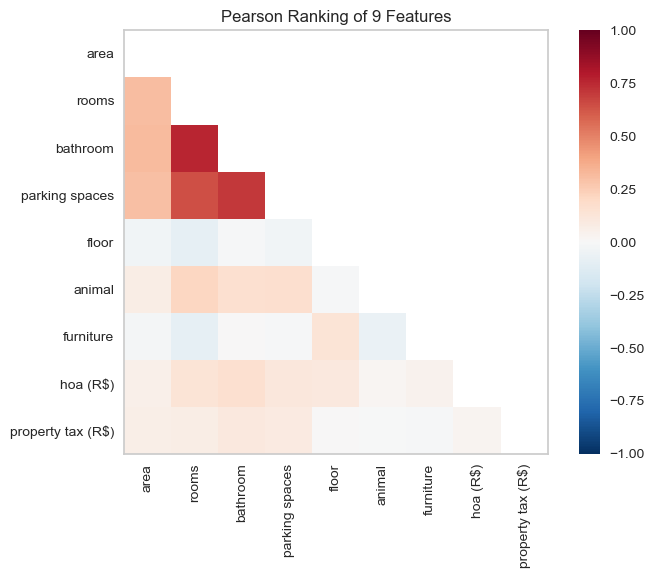

<AxesSubplot:title={'center':'Pearson Ranking of 9 Features'}>

In [50]:
from yellowbrick.features import Rank2D
Correlacao = Rank2D( algoritmo = 'pearson')
Correlacao.fit(Caracteristicas, Previsor)
Correlacao.transform(Caracteristicas)
Correlacao.show()

In [51]:
# defining data to train  and test (in this case 20% of the data)
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(Caracteristicas, Previsor, test_size=0.2, random_state=10)

In [52]:
print(f'Dados de Treino: {x_treino.shape[0]}')
print(f'Dados de Teste: {x_teste.shape[0]}')

Dados de Treino: 4709
Dados de Teste: 1178


In [53]:
# identifying the most important features
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# selecting the features
def Selecao_Features (x_treino, y_treino):
    #configuring to select the features
    Selecao = SelectKBest(score_func=mutual_info_regression, k='all') # eg.: k= 3 can be used to rank top 3 variables that impact most in the rent price 
    
    #train
    Selecao.fit(x_treino, y_treino)
    
    return Selecao
# applying the function
Scores = Selecao_Features(x_treino, y_treino)
# analyzing the function 
for Posicao, Score in enumerate(Scores.scores_):
    print(f'{x_treino.columns[Posicao]} : {Score}')

area : 0.04819189845143912
rooms : 0.2732113929447255
bathroom : 0.29233673236886926
parking spaces : 0.23336516054935474
floor : 0.02684222490759325
animal : 0.030129525776444233
furniture : 0.040447162595453445
hoa (R$) : 0.04819765188221181
property tax (R$) : 0.17403623402436708


## Creating the model

In [54]:
# Nos using other algorithm: random forest regressor
from sklearn.ensemble import RandomForestRegressor

# defining the instance
Modelo_floresta = RandomForestRegressor(max_depth=5)
#training the model
Modelo_floresta.fit(x_treino, y_treino)


RandomForestRegressor(max_depth=5)

In [55]:
# evaluating the performance
Previsoes = Modelo_floresta.predict(x_teste)

# calculating the error
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# evaluating the drror
print(f'RMSE: {sqrt(mean_squared_error(y_teste, Previsoes))}')
print(f'Scrore: {r2_score(y_teste,Previsoes)}')


RMSE: 2459.621439658588
Scrore: 0.5621471124449201


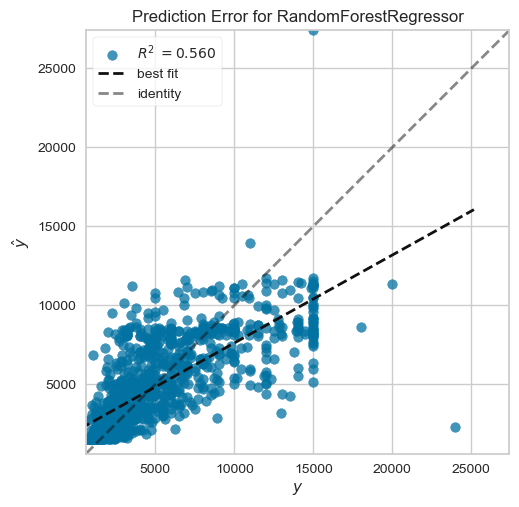

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [56]:
# evaluating with yellowbrick
from yellowbrick.regressor import PredictionError

#creating the instance
Modelo= RandomForestRegressor(max_depth=5)
Erro_modelo = PredictionError(Modelo)

#training
Erro_modelo.fit(x_treino,y_treino)
Erro_modelo.score(x_teste,y_teste)
Erro_modelo.show()


# Exporting the model

In [57]:
# exporting the model to the same folder of this notebook
import joblib
joblib.dump(Modelo_floresta, 'Modelo_floresta_aleatorio_v100.pkl')

['Modelo_floresta_aleatorio_v100.pkl']

In [59]:
# testing the model using the above file
Function_model = joblib.load('Modelo_floresta_aleatorio_v100.pkl')

In [63]:
#using the first row of x_test dataframe as data to test the model.
Function_model.predict(x_teste.head(1).values)

array([1530.33087714])

In [65]:
#notes
x_teste.head(1).values

array([[25,  1,  1,  0,  0,  0,  0,  0, 84]], dtype=int64)